In [14]:
#Start by connecting gdrive into the google colab

from google.colab import drive

drive.mount('/content/drive')
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data_preprosing_month_hist_encode_standarize_oversample.csv")
data=df.rename(columns={'Fraud':'Class'}).drop(columns=['Latitude','Longitude','hist_fraud_trans_24h'])
data.set_index('index',inplace=True)
x_train, x_test = train_test_split(data, test_size=0.2, random_state=RANDOM_SEED)
X_train = x_train[x_train.Class == 0]
X_train = X_train.drop(['Class'], axis=1)
x_train_r=x_train.drop(['Class'], axis=1)
y_train_r=x_train['Class']
x_test_r=x_test.drop(['Class'], axis=1)
y_test_r=x_test['Class']


Y_test = x_test['Class']
X_test = x_test.drop(['Class'], axis=1)

x_test = X_test
X_train = X_train.values
X_test = X_test.values

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [112]:
# df.sort_values('index').reset_index(inplace=False)
# df1=df
# df1.set_index('index',inplace=True)
# df1.iloc[429343]
# data.iloc[429343].name

In [15]:
#building the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier 
#random forest model creation 
rfc = RandomForestClassifier(n_estimators= 50, max_depth=11,max_features=5,oob_score=True, random_state=10)
rfc.fit(x_train_r, y_train_r) 
#predictions 
yPred = rfc.predict(x_test_r) 

In [ ]:
rfc.predict(record) 

array([1])

In [222]:
print(df['Fraud'].value_counts())

1.0    214956
0.0    214956
Name: Fraud, dtype: int64


In [18]:
#imbalance in the data
fraud = data[data['Class'] == 1] 
valid = data[data['Class'] == 0] 
outlierFraction = len(fraud)/float(len(valid)) 
print(outlierFraction) 
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1]))) 
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0]))) 

1.0
Fraud Cases: 214956
Valid Transactions: 214956


In [20]:
#building all kinds of evaluating parameters
from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 
yTest=y_test_r

n_outliers = len(fraud) 
n_errors = (yPred != yTest).sum() 
print("The model used is Random Forest classifier") 
  
acc = accuracy_score(yTest, yPred) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(yTest, yPred) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(yTest, yPred) 
print("The recall is {}".format(rec)) 
  
f1 = f1_score(yTest, yPred) 
print("The F1-Score is {}".format(f1)) 
  
MCC = matthews_corrcoef(yTest, yPred) 
print("The Matthews correlation coefficient is{}".format(MCC)) 

The model used is Random Forest classifier
The accuracy is 0.9335101124640918
The precision is 0.9604222288143973
The recall is 0.9042055530988898
The F1-Score is 0.9314664524868436
The Matthews correlation coefficient is0.8685032365394583


In [117]:
def generate_record(num):
    x_test_new=x_test.reset_index().drop('index',axis=1)
    record_values=x_test_new.iloc[num]
    values=[]
    values_items=[]
    for x in record_values.iteritems():
      #  columns.append([x[0]])
      values_items.append(x[1])
    values.append(values_items)
    record=pd.DataFrame(values,columns=x_test.columns)
    return record

In [22]:
!pip install shap
!pip install lime
df_original=pd.read_csv("/content/drive/My Drive/Colab Notebooks/data_preprosing_month_hist.csv")
columns=['index','Amount','Use Chip','Errors','Fraud','Trans_hour','Day_of_week','MCC_Category','Current Age','Gender','Latitude','Longitude','hist_trans_60d','hist_trans_24h',
       'hist_fraud_trans_24h','hist_trans_avg_amt_60d']
df_original=df_original[columns].drop(columns=['Latitude','Longitude','hist_fraud_trans_24h'])
import matplotlib.pyplot as pl
test=pd.DataFrame(yTest,columns=['Class'])
test['New_ID'] = range(0, len(test))
x_test['New_ID'] = range(0, len(x_test))
fraud=test[test['Class']==1]
non_fraud=test[test['Class']==0]
def randam_num():
    f_l=len(fraud)
    n_f_l=len(non_fraud)
    result=[]
    result.append(fraud.iloc[random.randint(0,f_l)].New_ID)
    result.append(fraud.iloc[random.randint(0,f_l)].New_ID)
    result.append(fraud.iloc[random.randint(0,f_l)].New_ID)
    result.append(non_fraud.iloc[random.randint(0,n_f_l)].New_ID)
    result.append(non_fraud.iloc[random.randint(0,n_f_l)].New_ID)
    return result

In [276]:
df_original

,Unnamed: 0,index,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors,Fraud,trans_date_trans_time,Trans_hour,Day_of_week,MCC_Category,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards,index.1,cc_num,num,val_for_agg,trans_date,hist_trans_60d,hist_trans_24h,hist_fraud_trans_24h,hist_fraud_trans_2h,hist_trans_avg_amt_60d
0,0,0,0,0,2008,10,1,17:59,7.78,Online Transaction,-521141999023077663,ONLINE,NaN,NaN,5815,NaN,No,2008-10-01 17:59:00,17,Wednesday,Miscellaneous Stores,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5,0,0_0,1,1,2008-10-01,0.0,0.0,0.0,0.0,0.000000
1,1,1,0,0,2008,10,2,05:39,136.34,Swipe Transaction,2027553650310142703,Mira Loma,CA,91752.0,5541,NaN,No,2008-10-02 05:39:00,5,Thursday,Retail Outlet Services,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5,0,0_0,1,1,2008-10-02,1.0,1.0,0.0,0.0,7.780000
2,2,2,0,0,2008,10,2,06:32,51.42,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No,2008-10-02 06:32:00,6,Thursday,Retail Outlet Services,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5,0,0_0,1,1,2008-10-02,1.0,2.0,0.0,0.0,7.780000
3,3,3,0,0,2008,10,2,13:57,51.04,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No,2008-10-02 13:57:00,13,Thursday,Retail Outlet Services,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5,0,0_0,1,1,2008-10-02,1.0,3.0,0.0,0.0,7.780000
4,4,4,0,0,2008,10,4,13:15,10.21,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No,2008-10-04 13:15:00,13,Saturday,Retail Outlet Services,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5,0,0_0,1,1,2008-10-04,4.0,4.0,0.0,0.0,51.358000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215918,215918,213346,1997,1,2008,11,29,16:20,149.39,Swipe Transaction,4597119782650359103,Elizabeth,NJ,7201.0,8043,NaN,No,2008-11-29 16:20:00,16,Saturday,Professional Services and Membership Organizat...,Annika Russell,47,67,1973,1,Female,276 Fifth Boulevard,NaN,Elizabeth,NJ,7201,40.66,-74.19,$15175,$30942,$71066,779,3,1997,1997_1,1,1,2008-11-29,147.0,3.0,0.0,0.0,42.185405
215919,215919,213347,1997,1,2008,11,29,18:20,30.55,Swipe Transaction,-7614744303815948174,Elizabeth,NJ,7201.0,5812,NaN,No,2008-11-29 18:20:00,18,Saturday,Miscellaneous Stores,Annika Russell,47,67,1973,1,Female,276 Fifth Boulevard,NaN,Elizabeth,NJ,7201,40.66,-74.19,$15175,$30942,$71066,779,3,1997,1997_1,1,1,2008-11-29,147.0,3.0,0.0,0.0,42.185405
215920,215920,213348,1997,1,2008,11,29,19:33,14.59,Swipe Transaction,-9095045032266102734,Elizabeth,NJ,7201.0,5813,NaN,No,2008-11-29 19:33:00,19,Saturday,Miscellaneous Stores,Annika Russell,47,67,1973,1,Female,276 Fifth Boulevard,NaN,Elizabeth,NJ,7201,40.66,-74.19,$15175,$30942,$71066,779,3,1997,1997_1,1,1,2008-11-29,147.0,4.0,0.0,0.0,42.185405
215921,215921,213349,1997,1,2008,11,30,19:05,32.47,Swipe Transaction,-4500542936415012428,Jenkintown,PA,19046.0,5814,NaN,No,2008-11-30 19:05:00,19,Sunday,Miscellaneous Stores,Annika Russell,47,67,1973,1,Female,276 Fifth Boulevard,NaN,Elizabeth,NJ,7201,40.66,-74.19,$15175,$30942,$71066,779,3,1997,1997_1,1,1,2008-11-30,151.0,4.0,0.0,0.0,42.635563


,Amount,Use Chip,Errors,Fraud,Trans_hour,Day_of_week,MCC_Category,Current Age,Gender,hist_trans_60d,hist_trans_24h,hist_trans_avg_amt_60d
index,,,,,,,,,,,,
73334,1.78,Online Transaction,NaN,Yes,13,Thursday,Utility Services,43,Female,30.0,4.0,10.182581


-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


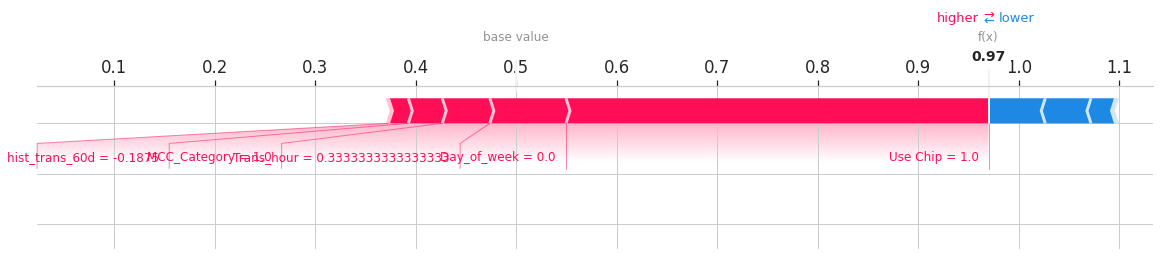

,Amount,Use Chip,Errors,Fraud,Trans_hour,Day_of_week,MCC_Category,Current Age,Gender,hist_trans_60d,hist_trans_24h,hist_trans_avg_amt_60d
index,,,,,,,,,,,,
211239,180.94,Online Transaction,NaN,Yes,11,Thursday,Utility Services,74,Male,44.0,1.0,5.271818


-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


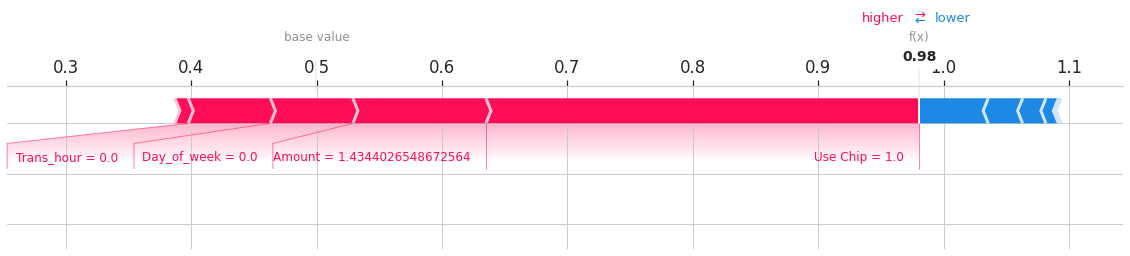

,Amount,Use Chip,Errors,Fraud,Trans_hour,Day_of_week,MCC_Category,Current Age,Gender,hist_trans_60d,hist_trans_24h,hist_trans_avg_amt_60d
index,,,,,,,,,,,,
3925,67.44,Online Transaction,NaN,Yes,12,Thursday,Miscellaneous Stores,51,Female,35.0,5.0,27.617778


-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


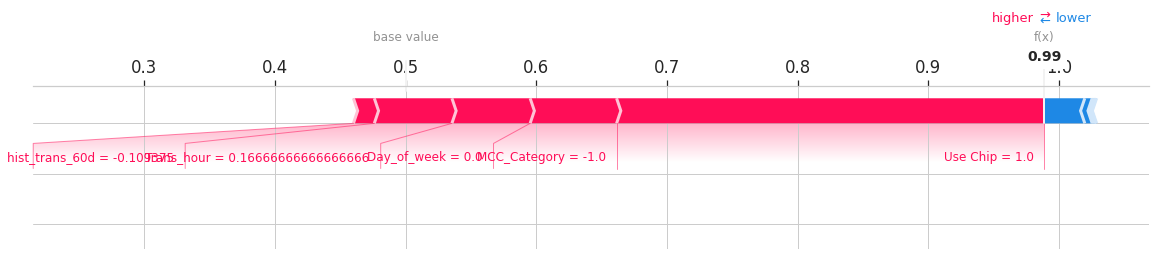

,Amount,Use Chip,Errors,Fraud,Trans_hour,Day_of_week,MCC_Category,Current Age,Gender,hist_trans_60d,hist_trans_24h,hist_trans_avg_amt_60d
index,,,,,,,,,,,,
211630,25.23,Online Transaction,NaN,No,10,Wednesday,Retail Outlet Services,38,Male,105.0,5.0,21.76419


-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


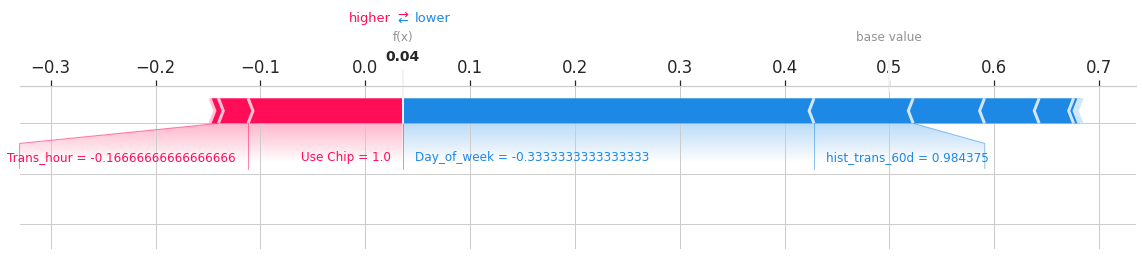

,Amount,Use Chip,Errors,Fraud,Trans_hour,Day_of_week,MCC_Category,Current Age,Gender,hist_trans_60d,hist_trans_24h,hist_trans_avg_amt_60d
index,,,,,,,,,,,,
152710,6.9,Swipe Transaction,NaN,No,8,Monday,Retail Outlet Services,36,Male,117.0,7.0,72.808644


-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


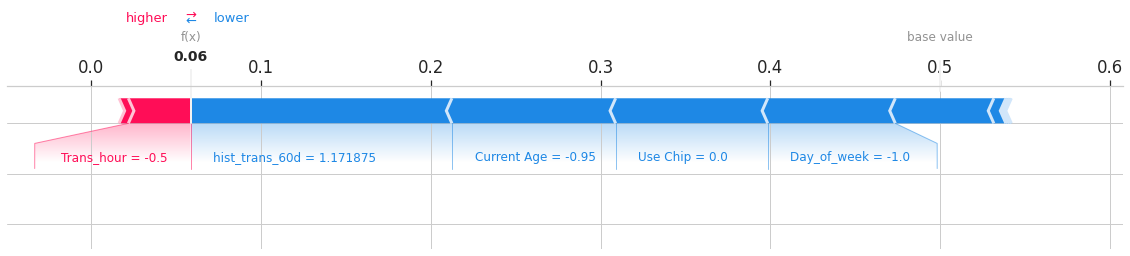

In [23]:
# Shap 随机Shap展示
# def generate_record(num):
#     # x_test_new=x_test.reset_index().drop('index',axis=1)
#     record_values=x_test[x_test['New_ID']==num].values
#     values=[]
#     values_items=[]
#     for x in record_values.iteritems():
#       #  columns.append([x[0]])
#       values_items.append(x[1])
#     values.append(values_items)
#     record=pd.DataFrame(values,columns=x_test.columns)
#     return record
import shap
def generate_shap(num):
    import shap
    record=x_test[x_test['New_ID']==num].drop(columns=['New_ID'])
    # Calculate Shap values
    explainer = shap.TreeExplainer(rfc)
    shap_values = explainer.shap_values(record)
    # shap.force_plot(explainer.expected_value[0], shap_values[1], record)
    shap.force_plot(explainer.expected_value[0], shap_values[1], record,show=True,matplotlib=True)
    # f = pl.gcf()
    # return f
# lime(generate_record(0))
# generate_record(0)
results=randam_num()
shap.initjs()
for i in results:
  df_show=df_original[df_original['index']==x_test[x_test['New_ID']==i].index[0]]
  df_show.set_index('index',inplace=True)
  display(df_show)
  print("-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
  generate_shap(i)


In [280]:
x_test[x_test['New_ID']==3].index[0]
def generate_table(results):
  names=locals()
  for i in resuls:
pd.concat([df1, df2])


10971.0

In [310]:
df_original[df_original['index']==x_test[x_test['New_ID']==3].index[0]]

AttributeError: ignored

In [321]:
display(fraud)

,Class,New_ID
index,,
74203.0,1.0,1
73732.0,1.0,2
10971.0,1.0,3
119846.0,1.0,13
118.0,1.0,14
...,...,...
54595.0,1.0,85976
23034.0,1.0,85977
119846.0,1.0,85978


In [255]:
import shap
x_test_new=x_test.reset_index().drop('index',axis=1)
record_values=x_test_new.iloc[32656]
values=[]
values_items=[]
for x in record_values.iteritems():
  #  columns.append([x[0]])
   values_items.append(x[1])
values.append(values_items)
record=pd.DataFrame(values,columns=x_test.columns)
# Calculate Shap values
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(record)
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[1], record)

In [251]:
yTest.iloc[32656]

0.0

In [192]:
for x in record_values.iteritems():
  #  columns.append([x[0]])
   print(x[1])
x_test_new

0.9543402777777776
0.0
0.0
-0.5714285714285714
0.25
0.0
0.7142857142857143
1.0
-0.06938775510204054
-2.0988882387361016
2.121621621621621
3.0
0.0
0.15247450784098113
32656.0


,Amount,Use Chip,Errors,Trans_hour,Day_of_week,MCC_Category,Current Age,Gender,Latitude,Longitude,hist_trans_60d,hist_trans_24h,hist_fraud_trans_24h,hist_trans_avg_amt_60d,New_ID
0,-0.477951,1.0,0.0,-0.571429,0.25,3.0,-0.190476,1.0,-1.119728,-0.231129,0.621622,-1.0,0.0,-0.107039,0
1,2.156424,1.0,3.0,-0.285714,0.00,1.0,1.523810,1.0,0.149660,0.559977,-0.486486,-0.5,1.0,-0.236530,1
2,4.183854,0.0,0.0,0.142857,0.75,2.0,0.047619,1.0,0.029932,-2.048566,0.770270,-0.5,1.0,0.408834,2
3,0.128125,1.0,0.0,-0.714286,0.75,-1.0,1.809524,0.0,0.472109,0.723815,0.648649,0.0,1.0,-0.033843,3
4,0.134375,1.0,0.0,-0.142857,-0.25,2.0,-0.809524,0.0,-1.142857,0.216501,-0.094595,0.5,0.0,-0.386930,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85978,-0.102257,1.0,0.0,-0.285714,0.75,2.0,1.666667,0.0,-0.673469,-1.813341,0.027027,1.0,1.0,-0.760524,85978
85979,-0.505382,0.0,0.0,-0.714286,0.75,-1.0,-0.333333,0.0,0.370068,0.727326,-0.351351,-1.0,4.0,0.151570,85979
85980,0.833854,0.0,0.0,-0.857143,-0.50,-1.0,0.000000,0.0,-0.024490,0.107665,0.527027,2.0,0.0,1.165731,85980
85981,1.340799,1.0,0.0,0.571429,0.00,0.0,0.142857,0.0,-0.744218,-0.645992,-0.054054,1.0,3.0,1.624113,85981


In [ ]:
x_test_new=x_test.reset_index().drop('index',axis=1)
record_values=x_test_new.iloc[32656]
values=[]
values_items=[]
for x in record_values.iteritems():
  #  columns.append([x[0]])
   values_items.append(x[1])
values.append(values_items)
record=pd.DataFrame(values,columns=x_test.columns)

In [147]:
x_test_new.filter(items = [2], axis=0)

,Amount,Use Chip,Errors,Trans_hour,Day_of_week,MCC_Category,Current Age,Gender,Latitude,Longitude,hist_trans_60d,hist_trans_24h,hist_fraud_trans_24h,hist_trans_avg_amt_60d
0,-0.477951,1.0,0.0,-0.571429,0.25,3.0,-0.190476,1.0,-1.119728,-0.231129,0.621622,-1.0,0.0,-0.107039
1,1.390625,1.0,0.0,-0.571429,0.00,-1.0,1.571429,1.0,0.715646,-2.215916,-0.229730,-0.5,1.0,0.788038
2,1.192708,0.0,0.0,-0.142857,-0.75,3.0,0.190476,1.0,-0.255782,0.176126,-0.081081,0.5,2.0,-0.355671
3,0.494097,1.0,0.0,0.000000,0.25,0.0,0.428571,1.0,0.210884,0.008777,-0.540541,0.0,3.0,-0.380715
4,0.134375,1.0,0.0,-0.142857,-0.25,2.0,-0.809524,0.0,-1.142857,0.216501,-0.094595,0.5,0.0,-0.386930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85978,0.165451,1.0,0.0,0.000000,0.25,0.0,-0.761905,0.0,-0.563265,-1.823874,-0.135135,-0.5,1.0,-0.355143
85979,1.502604,1.0,0.0,-0.571429,0.00,2.0,2.190476,1.0,0.017687,-2.085430,-0.202703,-0.5,2.0,-0.486011
85980,0.833854,0.0,0.0,-0.857143,-0.50,-1.0,0.000000,0.0,-0.024490,0.107665,0.527027,2.0,0.0,1.165731
85981,1.418576,1.0,0.0,-0.285714,0.00,0.0,0.428571,1.0,0.210884,0.008777,-0.567568,-1.0,3.0,-1.017798


In [43]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], record)

In [28]:
# LIME 随机lime展示
# def generate_record(num):
#     # x_test_new=x_test.reset_index().drop('index',axis=1)
#     record_values=x_test[x_test['New_ID']==num].values
#     values=[]
#     values_items=[]
#     for x in record_values.iteritems():
#       #  columns.append([x[0]])
#       values_items.append(x[1])
#     values.append(values_items)
#     record=pd.DataFrame(values,columns=x_test.columns)
#     return record
def lime(num):
    import lime
    import lime.lime_tabular
    record=x_test[x_test['New_ID']==num].drop(columns=['New_ID'])
    predict_fn_rf = lambda x: rfc.predict_proba(x).astype(float)
    X = X_train
    explainer = lime.lime_tabular.LimeTabularExplainer(X,feature_names = x_test.columns,class_names=['Not_Fraud','Fraud'],kernel_width=5)
    choosen_instance = record.values[0]
    exp = explainer.explain_instance(choosen_instance, predict_fn_rf,num_features=7)
    exp.show_in_notebook(show_all=False)
# lime(generate_record(0))
# generate_record(0)
results=randam_num()
for i in results:
  df_show=df_original[df_original['index']==x_test[x_test['New_ID']==i].index[0]]
  df_show.set_index('index',inplace=True)
  print("-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
  display(df_show.head(1))
  lime(i)

Output hidden; open in https://colab.research.google.com to view.

In [206]:
fraud

,Class,New_ID
index,,
122919.0,1.0,1
147404.0,1.0,2
59121.0,1.0,3
109907.0,1.0,13
123235.0,1.0,14
...,...,...
134883.0,1.0,85976
134884.0,1.0,85977
172104.0,1.0,85978


In [233]:
# import random
# random.randint(0,x_test_new)
for i in randam_num():
  lime(i)
# for i in x_test[x_test['New_ID']==0].iteritems():
#   print(type(i[1]))


Output hidden; open in https://colab.research.google.com to view.

In [167]:
fraud=pd.DataFrame(yTest,columns=['Class'])
fraud[fraud['Class']==1]
# x_test.filter(items = [58142.0], axis=0)
# x_test.iloc[42966]
randam_num()
fraud['New_ID'] = range(0, len(fraud))
fraud.iloc[0].New_ID

0.0

In [154]:
x_test


,Amount,Use Chip,Errors,Trans_hour,Day_of_week,MCC_Category,Current Age,Gender,Latitude,Longitude,hist_trans_60d,hist_trans_24h,hist_fraud_trans_24h,hist_trans_avg_amt_60d
index,,,,,,,,,,,,,,
58142.0,-0.477951,1.0,0.0,-0.571429,0.25,3.0,-0.190476,1.0,-1.119728,-0.231129,0.621622,-1.0,0.0,-0.107039
122919.0,2.156424,1.0,3.0,-0.285714,0.00,1.0,1.523810,1.0,0.149660,0.559977,-0.486486,-0.5,1.0,-0.236530
147404.0,4.183854,0.0,0.0,0.142857,0.75,2.0,0.047619,1.0,0.029932,-2.048566,0.770270,-0.5,1.0,0.408834
59121.0,0.128125,1.0,0.0,-0.714286,0.75,-1.0,1.809524,0.0,0.472109,0.723815,0.648649,0.0,1.0,-0.033843
53716.0,0.134375,1.0,0.0,-0.142857,-0.25,2.0,-0.809524,0.0,-1.142857,0.216501,-0.094595,0.5,0.0,-0.386930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172104.0,-0.102257,1.0,0.0,-0.285714,0.75,2.0,1.666667,0.0,-0.673469,-1.813341,0.027027,1.0,1.0,-0.760524
89701.0,-0.505382,0.0,0.0,-0.714286,0.75,-1.0,-0.333333,0.0,0.370068,0.727326,-0.351351,-1.0,4.0,0.151570
168831.0,0.833854,0.0,0.0,-0.857143,-0.50,-1.0,0.000000,0.0,-0.024490,0.107665,0.527027,2.0,0.0,1.165731


In [125]:
record

,Amount,Use Chip,Errors,Trans_hour,Day_of_week,MCC_Category,Current Age,Gender,Latitude,Longitude,hist_trans_60d,hist_trans_24h,hist_fraud_trans_24h,hist_trans_avg_amt_60d
0,0.95434,0.0,0.0,-0.571429,0.25,0.0,0.714286,1.0,-0.069388,-2.098888,2.121622,3.0,0.0,0.152475


In [126]:
x_test_new.iloc[0]

Amount                   -0.477951
Use Chip                  1.000000
Errors                    0.000000
Trans_hour               -0.571429
Day_of_week               0.250000
MCC_Category              3.000000
Current Age              -0.190476
Gender                    1.000000
Latitude                 -1.119728
Longitude                -0.231129
hist_trans_60d            0.621622
hist_trans_24h           -1.000000
hist_fraud_trans_24h      0.000000
hist_trans_avg_amt_60d   -0.107039
Name: 0, dtype: float64

In [ ]:
!unzip result_gif.zip


Archive:  result_gif.zip
  inflating: 00.png                  
  inflating: 01.png                  
  inflating: 02.png                  
  inflating: 03.png                  
  inflating: 04.png                  
  inflating: 05.png                  
  inflating: 06.png                  
  inflating: 07.png                  
  inflating: 08.png                  
  inflating: 09.png                  
  inflating: 0.png                   
  inflating: 100.png                 
  inflating: 101.png                 
  inflating: 102.png                 
  inflating: 103.png                 
  inflating: 104.png                 
  inflating: 105.png                 
  inflating: 106.png                 
  inflating: 107.png                 
  inflating: 108.png                 
  inflating: 109.png                 
  inflating: 10.png                  
  inflating: 110.png                 
  inflating: 111.png                 
  inflating: 112.png                 
  inflating: 113.png     